In [5]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [13]:
# import df

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/saldrellie/OneDrive - Lamb Weston Meijer/Desktop/Notebooks and Files/.ipynb_checkpoints/GANs/Fraud Detection - Financial transactions_PS_20174392719_1491204439457_log.csv')

df 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

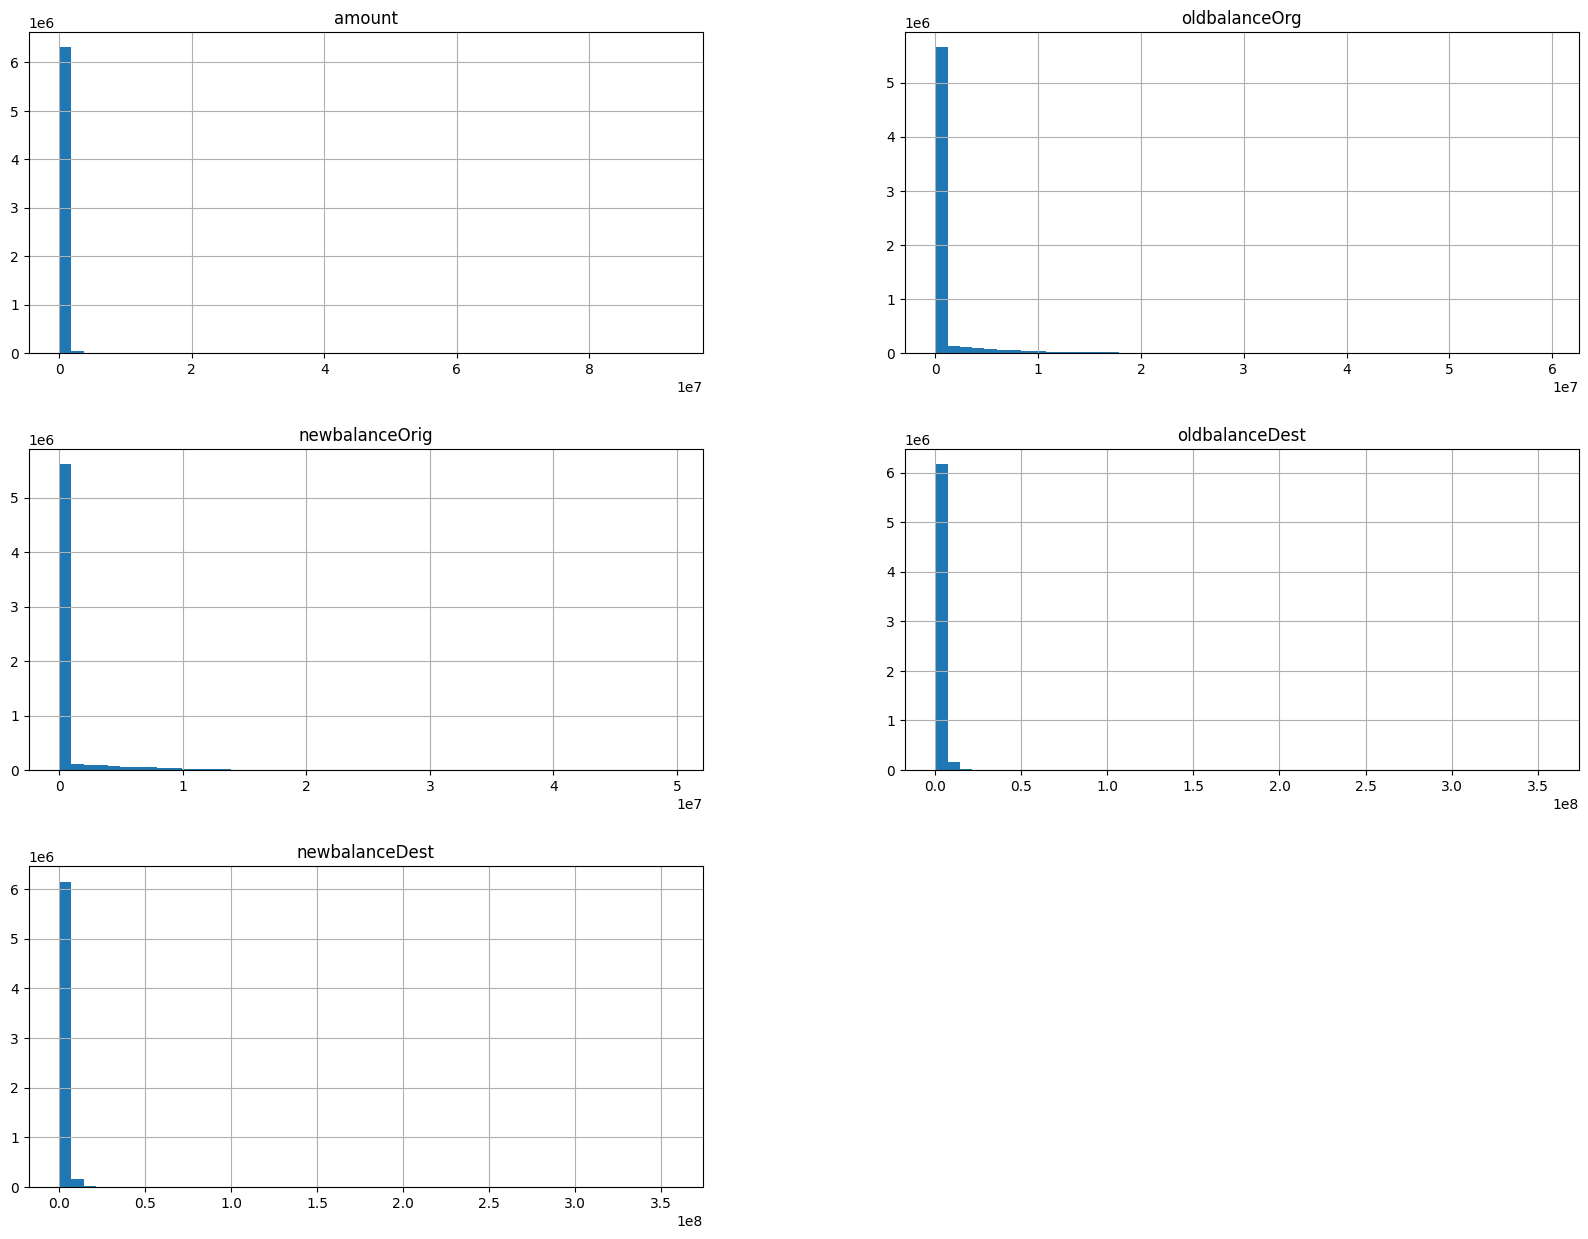

              step        amount  oldbalanceOrg  newbalanceOrig  \
count  8213.000000  8.213000e+03   8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06   1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06   3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05   1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05   4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06   1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    8.213000e+03    8.213000e+03   8213.0     8213.000000  
mean     5.442496e+05    1.279708e+06      1.0        0.001948  
std      3.336421e+06    3.908817e+06      0.0        0.044097  
min      0.000000e+00    0.000000e+00      1.0        0.000000  
25%      0.000000e+00    0.000000e+00      1.0        0.000000  
50%   

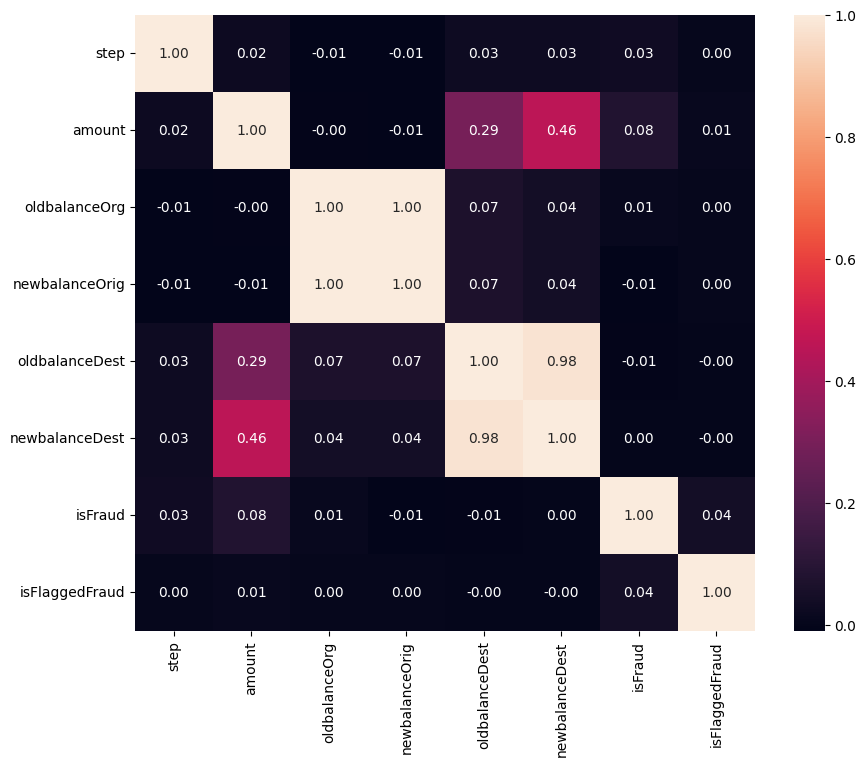

In [4]:
# basic EDA

print(df.describe())
print(df['type'].value_counts())


df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].hist(bins=50, figsize=(20,15))
plt.show()

# Analysis of fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]
print(fraud_transactions.describe())

# remove the categorical 'type' column for correlation calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f")
plt.show()


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [8]:
from sklearn.preprocessing import StandardScaler

features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Gan generator and discriminator architectures 

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.02),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.02),
            nn.Linear(256, output_dim),
            nn.Tanh()  # TANH activation to match the scaled distribution of the data
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.02),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.02),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, transaction):
        return self.net(transaction)


In [11]:
# GAN training

data = torch.tensor(scaled_features, dtype=torch.float)
dataset = torch.utils.data.TensorDataset(data)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# dimension of noise vector
input_dim = 100 

output_dim = data.shape[1]  
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# loss function
criterion = nn.BCELoss()

# training loop
epochs = 20
for epoch in range(epochs):
    for i, (transactions,) in enumerate(dataloader):
        valid = torch.ones((transactions.size(0), 1), requires_grad=False)
        fake = torch.zeros((transactions.size(0), 1), requires_grad=False)

       # generator
        optimizer_G.zero_grad()
        z = torch.randn(transactions.size(0), input_dim)
        generated_transactions = generator(z)
        g_loss = criterion(discriminator(generated_transactions), valid)
        g_loss.backward()
        optimizer_G.step()

        # discriminator 
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(transactions), valid)
        fake_loss = criterion(discriminator(generated_transactions.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D loss: {d_loss.item()} | G loss: {g_loss.item()}")


Epoch 1/20 | D loss: 0.6222938299179077 | G loss: 0.777823805809021
Epoch 2/20 | D loss: 0.5944420695304871 | G loss: 0.8193620443344116
Epoch 3/20 | D loss: 0.631403386592865 | G loss: 0.7533854246139526
Epoch 4/20 | D loss: 0.6290156841278076 | G loss: 0.8601016998291016
Epoch 5/20 | D loss: 0.6386822462081909 | G loss: 0.8217777013778687
Epoch 6/20 | D loss: 0.6412676572799683 | G loss: 0.9144427180290222
Epoch 7/20 | D loss: 0.6216098070144653 | G loss: 0.8094066977500916
Epoch 8/20 | D loss: 0.5858560800552368 | G loss: 0.7750729918479919
Epoch 9/20 | D loss: 0.6539806127548218 | G loss: 0.8395817279815674
Epoch 10/20 | D loss: 0.5858450531959534 | G loss: 0.8779830932617188
Epoch 11/20 | D loss: 0.6189393997192383 | G loss: 0.8326302170753479
Epoch 12/20 | D loss: 0.6131628155708313 | G loss: 0.9843218922615051
Epoch 13/20 | D loss: 0.6448280215263367 | G loss: 0.6796254515647888
Epoch 14/20 | D loss: 0.6172683238983154 | G loss: 0.7858597636222839
Epoch 15/20 | D loss: 0.5682017

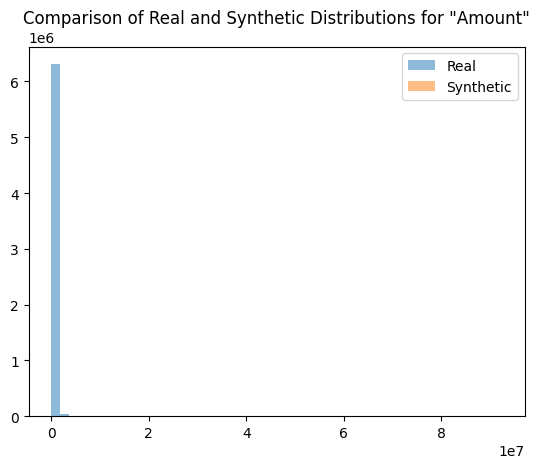

In [12]:
# generate synthetic data
z = torch.randn(1000, input_dim)  
synthetic_data = generator(z).detach().numpy()

# rescale the data back to the original distribution
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

# compare distributions for a specific feature, e.g., 'amount'
plt.hist(df['amount'], bins=50, alpha=0.5, label='Real')
plt.hist(synthetic_data_rescaled[:, 0], bins=50, alpha=0.5, label='Synthetic')  
plt.legend()
plt.title('Comparison of Real and Synthetic Distributions for "Amount"')
plt.show()

## Interpreting the given Losses

- Early Epochs (1-5): Initially, both losses fluctuate. This is normal as both the generator and discriminator are starting to learn their tasks. The generator's loss is generally higher, indicating it's not yet good at fooling the discriminator.

- Mid Epochs (6-15): As training progresses, both losses continue to fluctuate. The generator's loss begins to decrease in some epochs (indicating improvement), but there's still volatility. This suggests ongoing learning and adaptation by both networks.

- Later Epochs (16-20): Towards the end of training, the discriminator's loss decreases significantly, suggesting it has become quite good at distinguishing real from fake. 
However, the generator's loss increases, peaking at the last epoch. This could indicate that while the generator has improved (as evidenced by its ability to sometimes increase the D loss), the discriminator has adapted more effectively or that the generator is starting to overfit or produce less diverse outputs that the discriminator learns to identify more easily.